# Learning Notes X - NLTK

## Intro

NLTK : Natural Language Toolkit

    Conda Install:
        
        conda install -c conda-forge nltk_data
        
    Then run 
    
        import nltk
        nltk.download()

### Tokenize Words

In [2]:
from nltk.tokenize import sent_tokenize, word_tokenize
 
data = "All work and no play makes jack a dull boy, all work and no play"
print(word_tokenize(data))

['All', 'work', 'and', 'no', 'play', 'makes', 'jack', 'a', 'dull', 'boy', ',', 'all', 'work', 'and', 'no', 'play']


### Tokenize Sentences

In [4]:
from nltk.tokenize import sent_tokenize, word_tokenize
 
data = "All work and no play makes jack dull boy. All work and no play makes jack a dull boy."
print(sent_tokenize(data))

['All work and no play makes jack dull boy.', 'All work and no play makes jack a dull boy.']


### Arrays

In [6]:
from nltk.tokenize import sent_tokenize, word_tokenize
 
data = "All work and no play makes jack dull boy. All work and no play makes jack a dull boy."
 
phrases = sent_tokenize(data)
words = word_tokenize(data)
 
print(phrases)
print(words)

['All work and no play makes jack dull boy.', 'All work and no play makes jack a dull boy.']
['All', 'work', 'and', 'no', 'play', 'makes', 'jack', 'dull', 'boy', '.', 'All', 'work', 'and', 'no', 'play', 'makes', 'jack', 'a', 'dull', 'boy', '.']


### Remove Stop Words

In [7]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
 
data = "All work and no play makes jack dull boy. All work and no play makes jack a dull boy."
stopWords = set(stopwords.words('english'))
words = word_tokenize(data)
wordsFiltered = []
 
for w in words:
    if w not in stopWords:
        wordsFiltered.append(w)
 
print(wordsFiltered)

['All', 'work', 'play', 'makes', 'jack', 'dull', 'boy', '.', 'All', 'work', 'play', 'makes', 'jack', 'dull', 'boy', '.']


In [8]:
print(stopwords)

<WordListCorpusReader in 'C:\\Users\\delchain_default\\anaconda3\\lib\\nltk_data\\corpora\\stopwords'>


stop word location:
<WordListCorpusReader in 'C:\\Users\\delchain_default\\anaconda3\\lib\\nltk_data\\corpora\\stopwords'>

### Stemming

#### For words

In [10]:
# Import Porter (PorterStemer) stemming algorithm
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

# define some words
words = ["game","gaming","gamed","games"]
ps = PorterStemmer()
 
for word in words:
    print(ps.stem(word))

game
game
game
game


#### For sentences

In [12]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
 
ps = PorterStemmer()
 
sentence = "gaming, the gamers play games"
words = word_tokenize(sentence)
 
for word in words:
    print(word + ":" + ps.stem(word))

gaming:game
,:,
the:the
gamers:gamer
play:play
games:game


### Speech Tagging

In [13]:
# The example below automatically tags words with a corresponding class.

import nltk
from nltk.tokenize import PunktSentenceTokenizer
 
document = 'Whether you\'re new to programming or an experienced developer, it\'s easy to learn and use Python.'
sentences = nltk.sent_tokenize(document)   
for sent in sentences:
    print(nltk.pos_tag(nltk.word_tokenize(sent)))


[('Whether', 'IN'), ('you', 'PRP'), ("'re", 'VBP'), ('new', 'JJ'), ('to', 'TO'), ('programming', 'VBG'), ('or', 'CC'), ('an', 'DT'), ('experienced', 'JJ'), ('developer', 'NN'), (',', ','), ('it', 'PRP'), ("'s", 'VBZ'), ('easy', 'JJ'), ('to', 'TO'), ('learn', 'VB'), ('and', 'CC'), ('use', 'VB'), ('Python', 'NNP'), ('.', '.')]


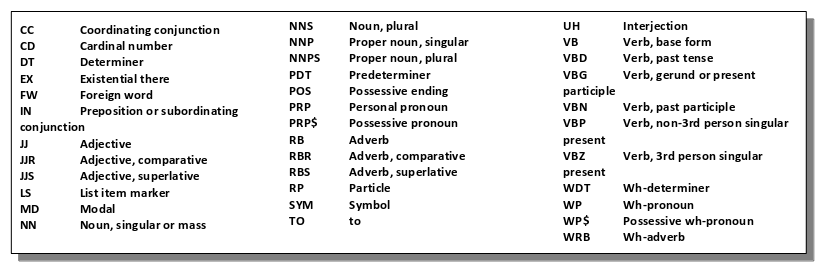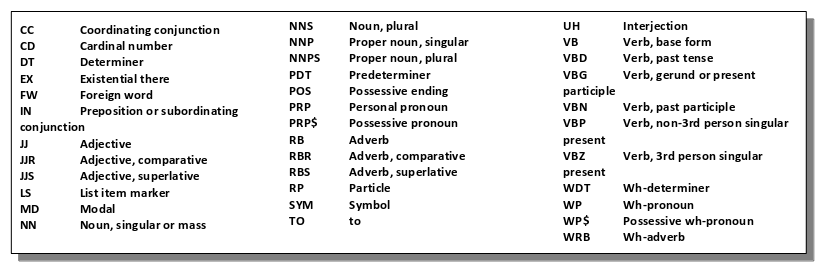

In [14]:
# We can filter this data based on the type of word:

import nltk
from nltk.corpus import state_union
from nltk.tokenize import PunktSentenceTokenizer
 
document = 'Today the Netherlands celebrates King\'s Day. To honor this tradition, the Dutch embassy in San Francisco invited me to'
sentences = nltk.sent_tokenize(document)   
 
data = []
for sent in sentences:
    data = data + nltk.pos_tag(nltk.word_tokenize(sent))
 
for word in data: 
    if 'NNP' in word[1]: 
        print(word)


('Netherlands', 'NNP')
('King', 'NNP')
('Day', 'NNP')
('San', 'NNP')
('Francisco', 'NNP')


## Sentiment Analysis

In [31]:
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import names
 
def word_feats(words):
    return dict([(word, True) for word in words])

# Start defining the vocabulary
positive_vocab = [ 'awesome', 'outstanding', 'fantastic', 'terrific', 'good', 'nice', 'great', ':)' ]
negative_vocab = [ 'bad', 'terrible','useless', 'hate', ':(' ]
neutral_vocab = [ 'movie','the','sound','was','is','actors','did','know','words','not', 'I' ]
insult_vocab = ['fake', 'stupid' ]

# Every word is converted into a feature using a simplified bag of words model:
positive_features = [(word_feats(pos), 'pos') for pos in positive_vocab]
negative_features = [(word_feats(neg), 'neg') for neg in negative_vocab]
neutral_features = [(word_feats(neu), 'neu') for neu in neutral_vocab]
insult_features = [(word_feats(ins), 'ins') for ins in insult_vocab]

# Our training set is then the sum of these three feature sets:
train_set = negative_features + positive_features + neutral_features + insult_features

# We train the classifier:
classifier = NaiveBayesClassifier.train(train_set) 
 
# Predict
neg = 0
pos = 0
neu = 0
ins = 0
sentence = "Awesome stupid movie, I liked it"
sentence = sentence.lower()
words = sentence.split(' ')
for word in words:
    classResult = classifier.classify( word_feats(word))
    if classResult == 'neg':
        neg = neg + 1
    if classResult == 'pos':
        pos = pos + 1
    if classResult == 'neu':
        neu = neu + 1
    if classResult == 'ins':
        ins = ins + 1

print('Positive: ' + str(float(pos)/len(words)))
print('Neutral: ' + str(float(neu)/len(words)))
print('Negative: ' + str(float(neg)/len(words)))
print('Insult: ' + str(float(ins)/len(words)))

Positive: 0.6666666666666666
Neutral: 0.0
Negative: 0.0
Insult: 0.3333333333333333


## Regular Expressions

### Filter Punctuation

In [34]:
import re
from collections import Counter

text = ['this', 'is', 'a', 'sentence', '.']
nonPunct = re.compile('.*[A-Za-z0-9].*')  # must contain a letter or digit
filtered = [w for w in text if nonPunct.match(w)]
counts = Counter(filtered)
counts


Counter({'this': 1, 'is': 1, 'a': 1, 'sentence': 1})